In [11]:
import numpy as np
import pandas as pd
data=pd.read_csv('NIFTY_6month.csv')
data.columns = data.columns.str.strip()
data['Date'] = pd.to_datetime(data['Date'], errors='coerce') 
data.set_index('Date', inplace=True) # This removes any leading/trailing spaces
print(data.columns)  # Check the cleaned column names

data.head()


Index(['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (₹ Cr)'], dtype='object')


C:\Users\Shahuraje\AppData\Local\Temp\ipykernel_6684\645282373.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
Date,,,,,,
2024-06-10,23319.15,23411.90,23227.15,23259.20,304392368.0,29060.40
2024-06-11,23283.75,23389.45,23206.65,23264.85,305185666.0,29190.91
2024-06-12,23344.45,23441.95,23295.95,23322.95,295630910.0,31795.48
2024-06-13,23480.95,23481.05,23353.90,23398.90,268279841.0,30151.67
2024-06-14,23464.95,23490.40,23334.25,23465.60,223086741.0,25746.34


In [12]:
data.tail()
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (₹ Cr)'], dtype='object')

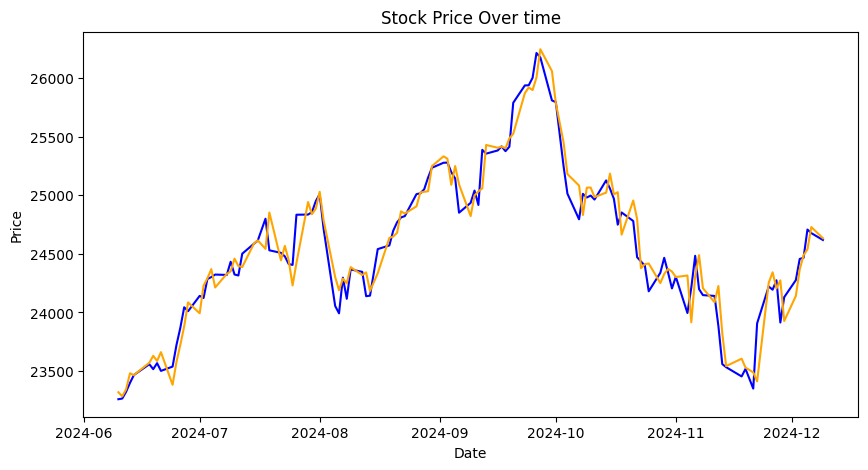

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(data['Close'],label='Close Price',color='blue')
plt.plot(data['Open'],label='Open Price',color='orange')
plt.title('Stock Price Over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

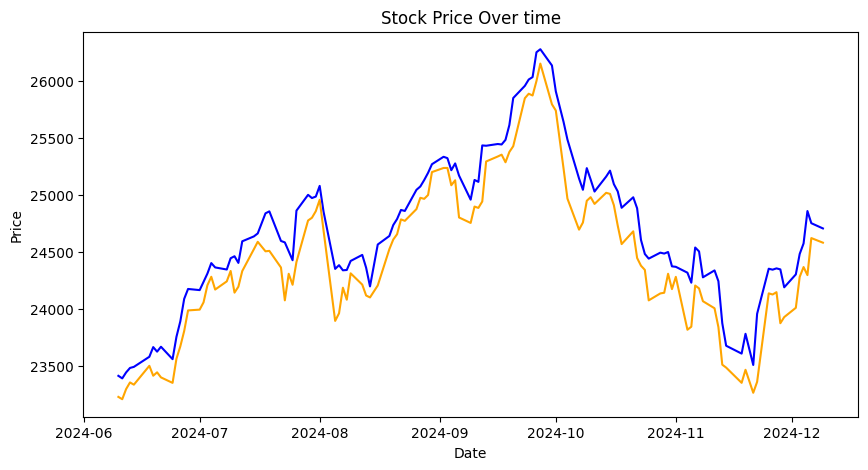

In [14]:
plt.figure(figsize=(10,5))
plt.plot(data['High'],label='High Price',color='blue')
plt.plot(data['Low'],label='Low Price',color='orange')
plt.title('Stock Price Over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#Check stationary

In [15]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(data['Close'])
print("ADF Statics : ",result[0])
print("p-value : ",result[1])
if(result[1]<=0.05):
    print("The data is stationary.")
else:
     print("The data is not stationary. Differencing might be required.")

ADF Statics :  -2.2248576029560834
p-value :  0.19734758288225512
The data is not stationary. Differencing might be required.


In [16]:
#differencing
data['Close_diff']=data['Close'].diff().dropna()
#Check data is stationary
result=adfuller(data['Close_diff'].dropna())
print("ADF Statics : ",result[0])
print("p-value : ",result[1])
if(result[1]<=0.05):
    print("The data is stationary.")
else:
     print("The data is not stationary. Differencing might be required.")


ADF Statics :  -10.264571017619017
p-value :  4.1515226350372456e-18
The data is stationary.


#Autocorrelation and Partial Autocorrelation

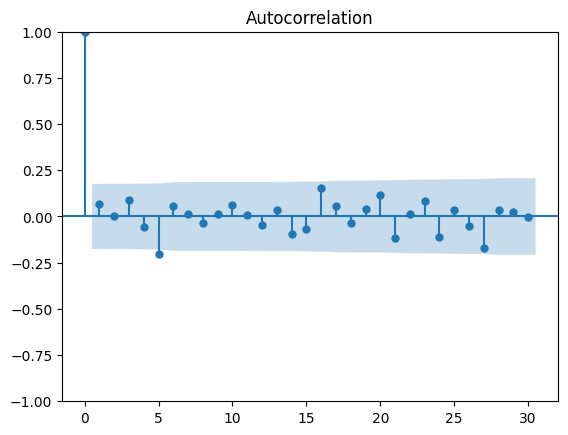

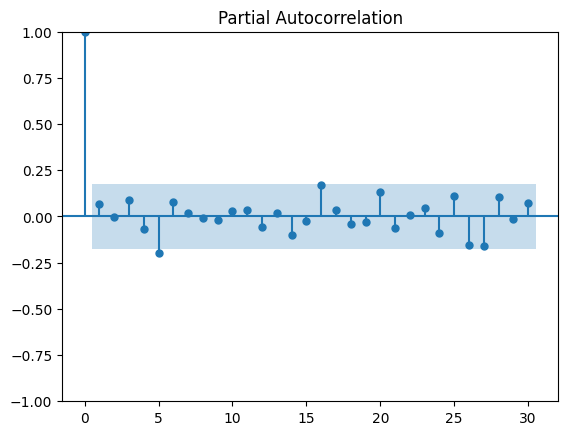

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data["Close_diff"].dropna(),lags=30)
plot_pacf(data["Close_diff"].dropna(),lags=30)
plt.show()

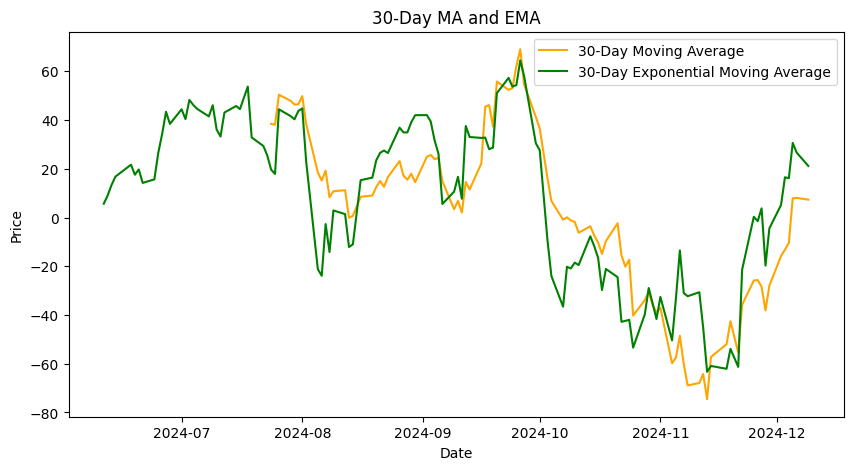

In [18]:
# Calculate 30-day Moving Average and Exponential Moving Average
data['30_day_MA'] = data['Close_diff'].rolling(window=30).mean()
data['30_day_EMA'] = data['Close_diff'].ewm(span=30, adjust=False).mean()

# Plotting the Moving Averages
plt.figure(figsize=(10, 5))
plt.plot(data['30_day_MA'], label='30-Day Moving Average', color='orange')
plt.plot(data['30_day_EMA'], label='30-Day Exponential Moving Average', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('30-Day MA and EMA')
plt.legend()
plt.show()



In [19]:
print(data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (₹ Cr)',
       'Close_diff', '30_day_MA', '30_day_EMA'],
      dtype='object')


c:\Users\Shahuraje\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shahuraje\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shahuraje\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Date
2024-11-26    24194.50
2024-11-27    24274.90
2024-11-28    23914.15
2024-11-29    24131.10
2024-12-02    24276.05
2024-12-03    24457.15
2024-12-04    24467.45
2024-12-05    24708.40
2024-12-06    24677.80
2024-12-09    24619.00
Name: Close, dtype: float64

 predicted data
Date
2024-11-01    24113.555400
2024-11-04    24255.337933
2024-11-05    23930.283483
2024-11-06    24199.262617
2024-11-07    24490.118814
2024-11-08    24131.620570
2024-11-11    24192.906779
2024-11-12    24016.871054
2024-11-13    23762.605820
2024-11-14    23492.899691
2024-11-18    23427.246327
2024-11-19    23332.963385
2024-11-21    23508.123888
2024-11-22    23438.497318
2024-11-25    23936.808030
2024-11-26    24204.683897
2024-11-27    24270.363799
2024-11-28    24227.580158
2024-11-29    23722.891308
2024-12-02    24177.170909
2024-12-03    24312.462412
2024-12-04    24468.904926
2024-12-05    24587.976145
2024-12-06    24680.450267
2024-12-09    24623.375804
Name: predicted_mean, dtype: float64


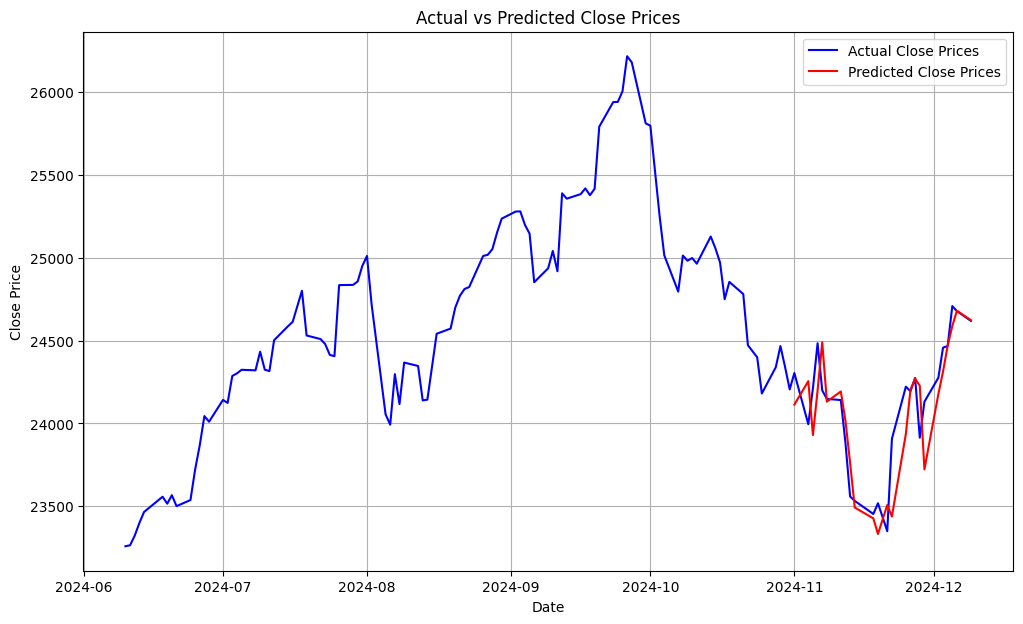

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(data['Close'], order=(23,2,0))
arima_result = model.fit()

# Print summary of the ARIMA model
#print(arima_result.summary())


start_date = pd.to_datetime("2024-11-01")  # Add time component to match data format
end_date = pd.to_datetime("2024-12-09")    # Add time component to match data format

# Check if the dates are within the range of the index
if start_date not in data.index or end_date not in data.index:
    print(f"The start_date or end_date is not found in the data's index. Available dates are:")
    print(data.index.min(), "to", data.index.max())
else:
    # Predict the data for the given date range
    predicted_data = arima_result.predict(start=start_date, end=end_date, typ='levels')
    print(data['Close'].tail(10))
    print("\n predicted data")
    print(predicted_data)

    # Plot the actual and predicted data
    plt.figure(figsize=(12, 7))

    # Plot the actual data
    plt.plot(data.index, data['Close'], label='Actual Close Prices', color='blue')

    # Plot the predicted data (only within the specified date range)
    plt.plot(predicted_data.index, predicted_data, label='Predicted Close Prices', color='red')

    # Title and labels
    plt.title('Actual vs Predicted Close Prices')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()


c:\Users\Shahuraje\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shahuraje\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shahuraje\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Date
2024-11-26    24194.50
2024-11-27    24274.90
2024-11-28    23914.15
2024-11-29    24131.10
2024-12-02    24276.05
2024-12-03    24457.15
2024-12-04    24467.45
2024-12-05    24708.40
2024-12-06    24677.80
2024-12-09    24619.00
Name: Close, dtype: float64

 predicted data
Date
2024-06-10        0.000000
2024-06-11    34928.753771
2024-06-12    23751.337155
2024-06-13    23653.242094
2024-06-14    23573.392341
                  ...     
2024-12-03    24286.700587
2024-12-04    24478.737297
2024-12-05    24607.502159
2024-12-06    24662.847328
2024-12-09    24601.074043
Name: predicted_mean, Length: 125, dtype: float64


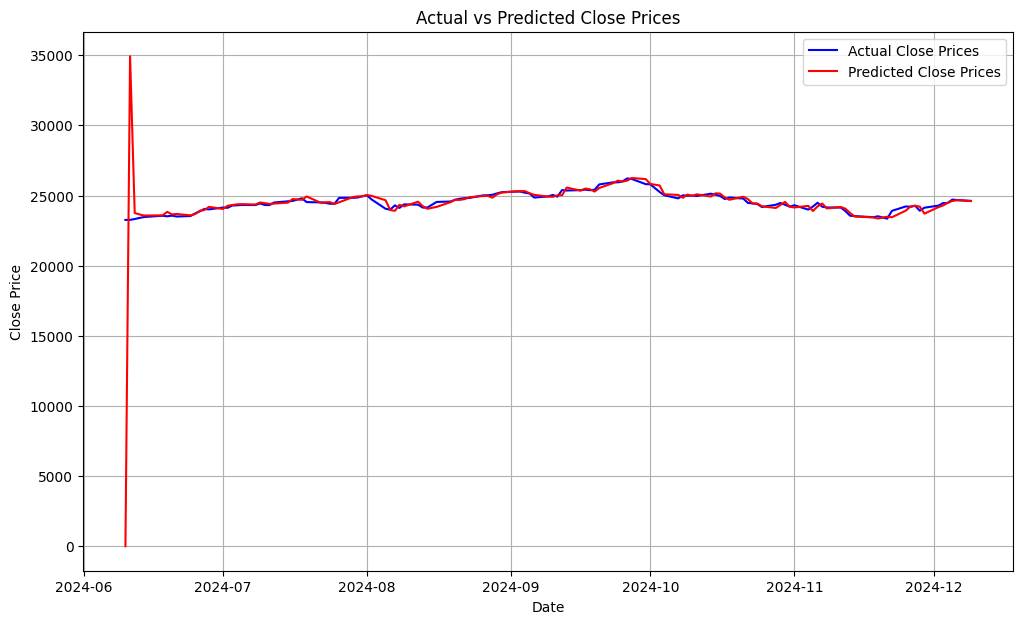

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(data['Close'], order=(24,2, 0))
arima_result = model.fit()

# Print summary of the ARIMA model
#print(arima_result.summary())


start_date = pd.to_datetime("2024-11-01")  # Add time component to match data format
end_date = pd.to_datetime("2024-12-09")    # Add time component to match data format

# Check if the dates are within the range of the index
if start_date not in data.index or end_date not in data.index:
    print(f"The start_date or end_date is not found in the data's index. Available dates are:")
    print(data.index.min(), "to", data.index.max())
else:
    # Predict the data for the given date range
    predicted_data = arima_result.predict()
    print(data['Close'].tail(10))
    print("\n predicted data")
    print(predicted_data)

    # Plot the actual and predicted data
    plt.figure(figsize=(12, 7))

    # Plot the actual data
    plt.plot(data.index, data['Close'], label='Actual Close Prices', color='blue')

    # Plot the predicted data (only within the specified date range)
    plt.plot(predicted_data.index, predicted_data, label='Predicted Close Prices', color='red')

    # Title and labels
    plt.title('Actual vs Predicted Close Prices')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

c:\Users\Shahuraje\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


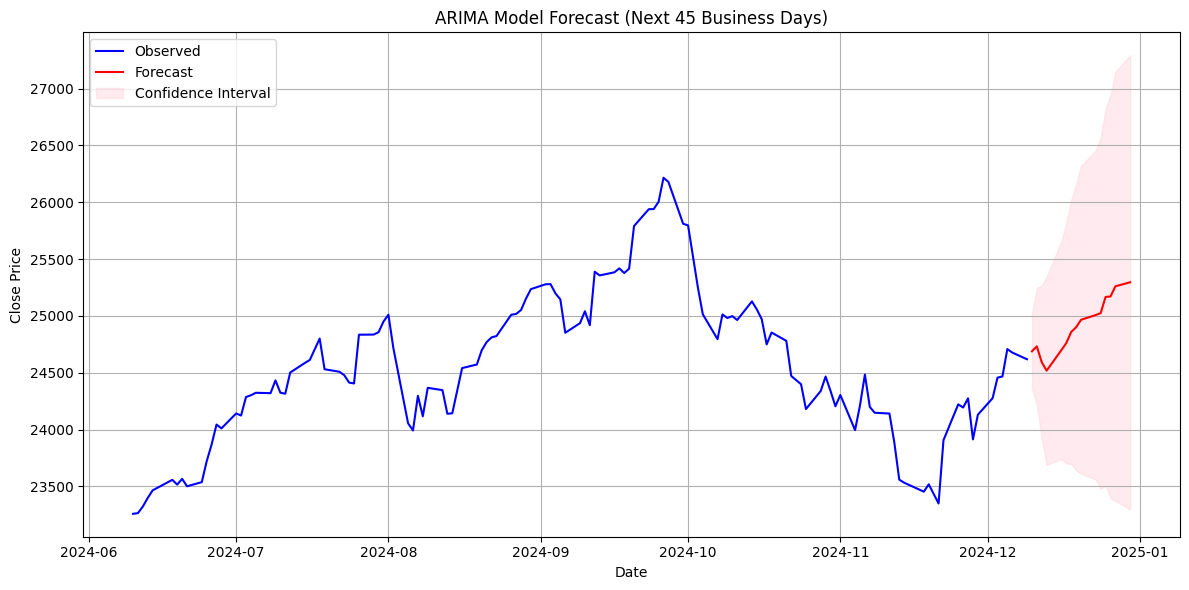

In [95]:
# Forecast the next 45 days
forecast_steps = 15
forecast = arima_result.get_forecast(steps=forecast_steps)

# Create a new index for the forecast
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

# Extract forecasted values and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the observed data and forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Observed', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(
    forecast_index,
    forecast_ci.iloc[:, 0],  # Lower bound of the confidence interval
    forecast_ci.iloc[:, 1],  # Upper bound of the confidence interval
    color='pink',
    alpha=0.3,
    label='Confidence Interval'
)

# Customize the plot
plt.title('ARIMA Model Forecast (Next 45 Business Days)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
import numpy as np

# Calculate RMSE manually
train_predictions = arima_result.fittedvalues
rmse = np.sqrt(((train_predictions - data['Close']) ** 2).mean())
print("RMSE:", rmse)



RMSE: 2333.7105351751366


In [23]:
# Save the forecast to a CSV file
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecast': forecast_mean,
    'Lower_CI': forecast_ci.iloc[:, 0],
    'Upper_CI': forecast_ci.iloc[:, 1]
})
forecast_df.to_csv('forecasted_data.csv', index=False)
df=pd.read_csv('forecasted_data.csv')
df



,Date,Forecast,Lower_CI,Upper_CI
0,2024-12-10,24753.809616,24440.363112,25067.256121
1,2024-12-11,24816.738778,24327.030050,25306.447505
2,2024-12-12,24710.250458,24063.603931,25356.896986
3,2024-12-13,24681.381868,23886.360478,25476.403258
4,2024-12-16,24823.213767,23896.749397,25749.678138
5,2024-12-17,24895.341465,23870.461881,25920.221048
6,2024-12-18,25062.099575,23935.017852,26189.181298
7,2024-12-19,25075.705066,23844.119896,26307.290237
8,2024-12-20,25138.382524,23805.627317,26471.137730
9,2024-12-23,25299.296188,23870.303655,26728.288722


In [24]:
data.tail()

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),Close_diff,30_day_MA,30_day_EMA
Date,,,,,,,,,
2024-12-03,24367.50,24481.35,24280.00,24457.15,339470947.0,34228.30,181.10,-13.230000,16.516708
2024-12-04,24488.75,24573.20,24366.30,24467.45,348003156.0,34639.78,10.30,-10.455000,16.115630
2024-12-05,24539.15,24857.75,24295.55,24708.40,361469920.0,40471.33,240.95,7.876667,30.621073
2024-12-06,24729.45,24751.05,24620.50,24677.80,226731303.0,23904.13,-30.60,8.076667,26.671326
2024-12-09,24633.90,24705.00,24580.05,24619.00,248139308.0,25099.79,-58.80,7.320000,21.157047
